# Classification Problem (Cylinders)

Make a copy of the data before mutating

Let's take a closer look at the data

In [21]:
data <- mtcars
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

### Make factors
We want to use factors when possible (discrete values)

In [22]:
data$vs <- factor(as.integer(data$vs), levels = c(0, 1), labels = c('straight', 'v'))
data$am <- factor(as.integer(data$am), levels = c(0, 1), labels = c('automatic', 'manual'))
data$gear <- factor(as.integer(data$gear), levels = 3:5, labels = c('three','four','five'))
data$carb <- factor(as.integer(data$carb), levels = 1:8, labels = c('one', 'two', 'three','four','five','six','seven','eight'))

data$cyl <- factor(as.integer(data$cyl), levels = c(4,6,8), labels = c('Four Cyl.', 'Six Cyl.', 'Eight Cyl.'))
summary(data$cyl)

Four Cyl.   Six Cyl. Eight Cyl. 
        11          7         14

### Split the test and train data
This time no set.seed() call, so random. Rerun notebook to see different results.

In [23]:
library(caret)
index.train <- createDataPartition(data$cyl, p = 0.7, list = FALSE)
train = data[index.train,]
test  = data[-(index.train), ]

### Train
We will use a tuning grid to find the best model and best hyperparameters

In [24]:
tg <- data.frame(.decay = 30:50/40)
tg
model <- train(cyl ~ .,
               data = train,
               method = "multinom",
               tuneGrid = tg)

,.decay
1,0.75
2,0.775
3,0.8
4,0.825
5,0.85
6,0.875
7,0.9
8,0.925
9,0.95
10,0.975


# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 4.358552
iter  20 value 1.501450
iter  30 value 1.264032
iter  40 value 1.258305
iter  50 value 1.257269
final  value 1.257266 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 4.359993
iter  20 value 1.520580
iter  30 value 1.288282
iter  40 value 1.282787
iter  50 value 1.281768
final  value 1.281767 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 4.361374
iter  20 value 1.539895
iter  30 value 1.312144
iter  40 value 1.306837
iter  50 value 1.305854
final  value 1.305854 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 4.362781
iter  20 value 1.559426
iter  30 value 1.335607
iter  40 value 1.330460
iter  50 value 1.329544
final  value 1.329543 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 4.364290
iter  20 value 1.579112
iter  30 value 1.358711
iter  40 value 1.353658
iter  50 value 1.

### View Model

Note the line "was used to select the best..." because of the tuning grid

In [25]:
model
summary(model)

Penalized Multinomial Regression 

23 samples
10 predictors
 3 classes: 'Four Cyl.', 'Six Cyl.', 'Eight Cyl.' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 23, 23, 23, 23, 23, 23, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0.750  0.8613449  0.7809065
  0.775  0.8613449  0.7809065
  0.800  0.8613449  0.7809065
  0.825  0.8613449  0.7809065
  0.850  0.8613449  0.7809065
  0.875  0.8613449  0.7809065
  0.900  0.8613449  0.7809065
  0.925  0.8613449  0.7809065
  0.950  0.8613449  0.7809065
  0.975  0.8613449  0.7809065
  1.000  0.8613449  0.7809065
  1.025  0.8613449  0.7809065
  1.050  0.8613449  0.7809065
  1.075  0.8613449  0.7809065
  1.100  0.8613449  0.7809065
  1.125  0.8613449  0.7809065
  1.150  0.8613449  0.7809065
  1.175  0.8613449  0.7809065
  1.200  0.8613449  0.7809065
  1.225  0.8613449  0.7809065
  1.250  0.8613449  0.7809065

Accuracy was used to select the optimal model using  the largest value.
T

Warning message:
In sqrt(diag(vc)): NaNs produced

Call:
multinom(formula = .outcome ~ ., data = dat, decay = param$decay)

Coefficients:
            (Intercept)        mpg       disp         hp         drat
Six Cyl.   -0.002064094 -0.3420791 0.07152880 0.01447141  0.008254324
Eight Cyl. -0.026961415 -0.6108974 0.08233837 0.07475112 -0.118658479
                    wt       qsec         vsv    ammanual    gearfour
Six Cyl.    0.01479175 -0.2684844 -0.02558522  0.01921972  0.04446382
Eight Cyl. -0.06835597 -0.5886105 -0.07037635 -0.00756341 -0.04860203
                gearfive     carbtwo   carbthree    carbfour carbfive carbsix
Six Cyl.   -5.922027e-04 -0.12178897 -0.03697566  0.16255116        0       0
Eight Cyl.  3.683138e-05  0.01262551  0.03700849 -0.04762001        0       0
           carbseven    carbeight
Six Cyl.           0 2.901483e-06
Eight Cyl.         0 5.951509e-06

Std. Errors:
           (Intercept)      mpg      disp        hp     drat        wt     qsec
Six Cyl.      3.835151 1.808567 0.1911998 0.2631872 12.50542  8

### Predict

In [26]:
test$predicted <- predict(model, test)

### View Results

In [27]:
test[, c('cyl', 'predicted')]

,cyl,predicted
Mazda RX4,Six Cyl.,Six Cyl.
Merc 450SLC,Eight Cyl.,Eight Cyl.
Honda Civic,Four Cyl.,Four Cyl.
Dodge Challenger,Eight Cyl.,Eight Cyl.
AMC Javelin,Eight Cyl.,Eight Cyl.
Pontiac Firebird,Eight Cyl.,Eight Cyl.
Fiat X1-9,Four Cyl.,Four Cyl.
Porsche 914-2,Four Cyl.,Four Cyl.
Ferrari Dino,Six Cyl.,Eight Cyl.


### Confusion Matrix

In [28]:
cm <- confusionMatrix(test$predicted, test$cyl)
cm

Confusion Matrix and Statistics

            Reference
Prediction   Four Cyl. Six Cyl. Eight Cyl.
  Four Cyl.          3        0          0
  Six Cyl.           0        1          0
  Eight Cyl.         0        1          4

Overall Statistics
                                          
               Accuracy : 0.8889          
                 95% CI : (0.5175, 0.9972)
    No Information Rate : 0.4444          
    P-Value [Acc > NIR] : 0.008289        
                                          
                  Kappa : 0.82            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Four Cyl. Class: Six Cyl. Class: Eight Cyl.
Sensitivity                    1.0000          0.5000            1.0000
Specificity                    1.0000          1.0000            0.8000
Pos Pred Value                 1.0000          1.0000            0.8000
Neg Pred Value                 1.0000          0.8750            1.0000
Prevalence                

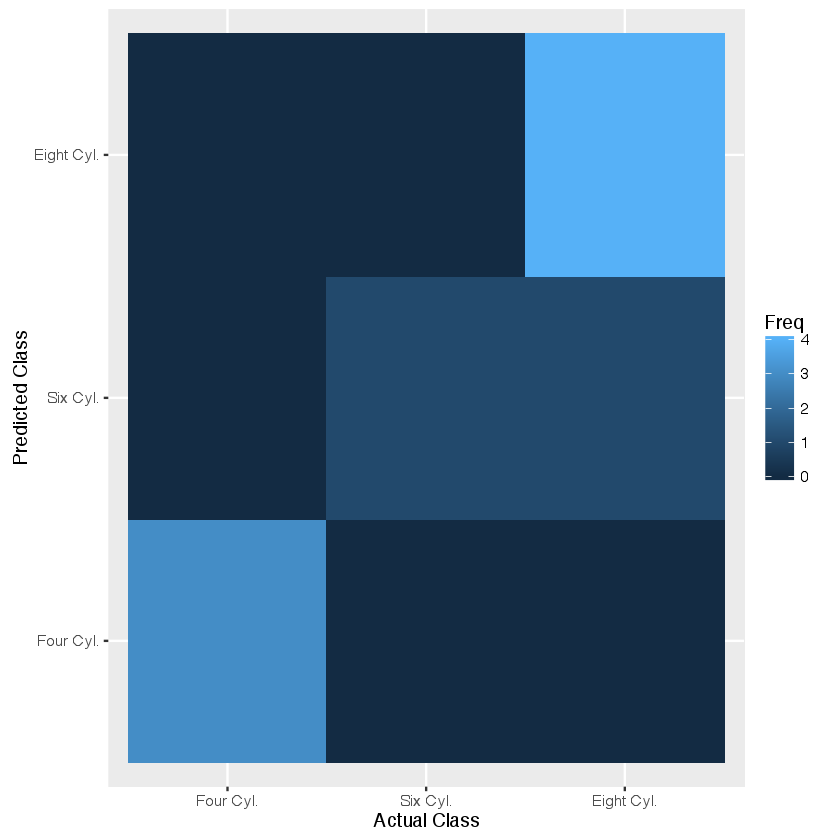

In [29]:
ggplot(as.data.frame(cm$table)) + 
  geom_tile(aes(x=Prediction, y=Reference, fill=Freq)) + 
  scale_x_discrete(name="Actual Class") + 
  scale_y_discrete(name="Predicted Class")